In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [37]:
# Load the cleaned DataFrame
cleaned_df = pd.read_csv("/Users/sa18/Desktop/Unsupervised_DJ/Data/cleaned_data.csv")

In [38]:
cleaned_df.head()

,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.0
1,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.0
2,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.0
3,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.0
4,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.0


In [39]:
# print out the shape of this dataframe to note the number of samples

cleaned_df.shape

(28362, 18)

# K Means Clustering Without Scaling

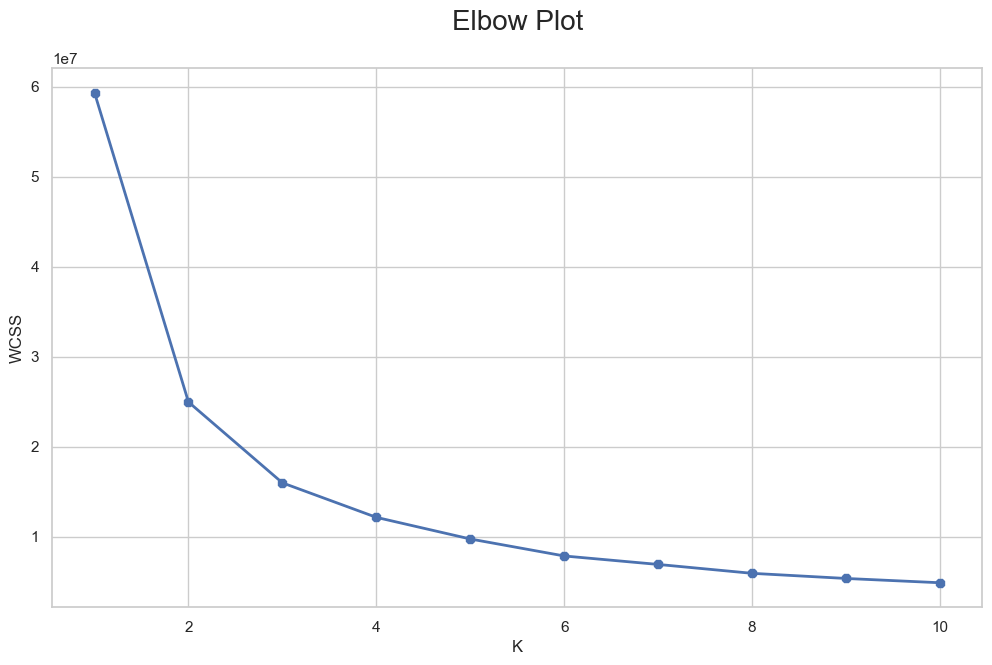

In [40]:
# create an Elbow Plot of WCSS

X1 = cleaned_df.loc[:, ['release_date', 'len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 
                'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions',
                 'family/spiritual', 'sadness', 'feelings', 'age' ]].values

wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

sns.set(style='whitegrid') # to show gridlines
plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

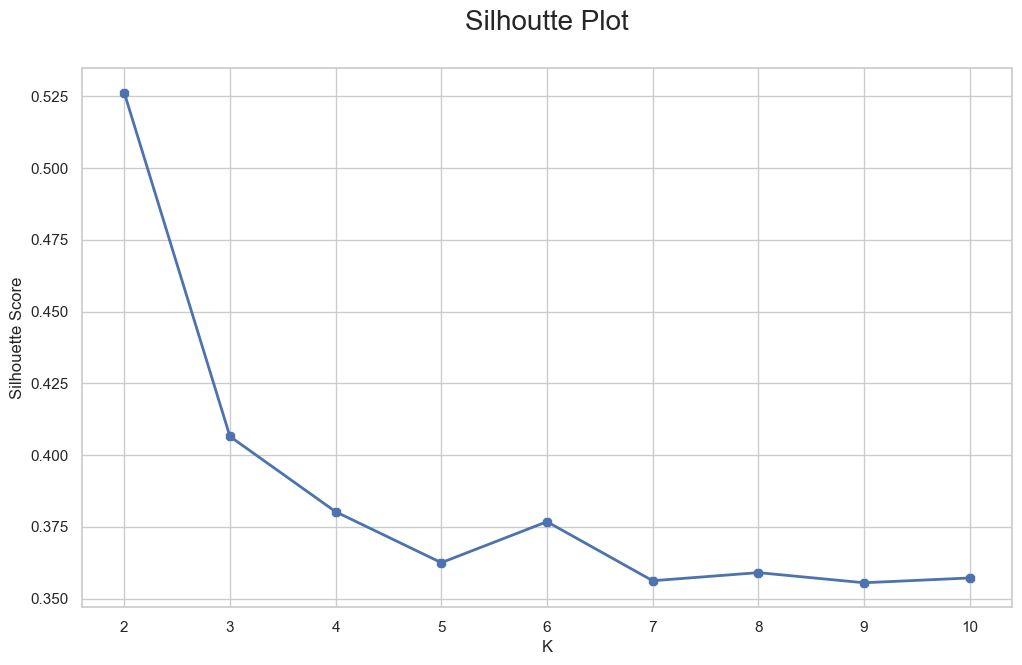

In [41]:
# create a plot of Silhoutte Score

silhouette = []
for k in range(2, 11):
    # create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=42)
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 11), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

According to the Elbow and Silhouette plots, 2 is the best number of clusters. K=2

In [42]:
# create a KMeans object with this optimal number of clusters. Name this object `kmeans`

kmeans = KMeans(n_clusters = 2)

# fit this KMeans object using your `X1` data

kmeans.fit(X1)

KMeans(n_clusters=2)

In [43]:
# Generate labels for the  dataset

labels = kmeans.fit_predict(X1)
labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [44]:
# output the centroids of your clusters

kmeans.cluster_centers_

array([[1.99821312e+03, 1.31429643e+02, 1.91866572e-02, 1.33059039e-01,
        9.08220861e-02, 4.81187741e-02, 2.30662258e-02, 1.69546838e-02,
        2.51247255e-02, 6.83820968e-02, 2.07217944e-01, 4.47511146e-02,
        6.31126217e-02, 4.13046574e-02, 2.42528942e-02, 7.88006646e-02,
        2.84352028e-02, 3.11241186e-01],
       [1.98745872e+03, 5.26624976e+01, 2.17804316e-02, 1.13248474e-01,
        1.31503538e-01, 6.05774917e-02, 1.54486009e-02, 1.70765947e-02,
        5.68897465e-02, 7.95343840e-02, 5.88091284e-02, 6.54083791e-02,
        4.19425258e-02, 5.16946565e-02, 2.41206309e-02, 1.47049813e-01,
        3.18880255e-02, 4.64875404e-01]])

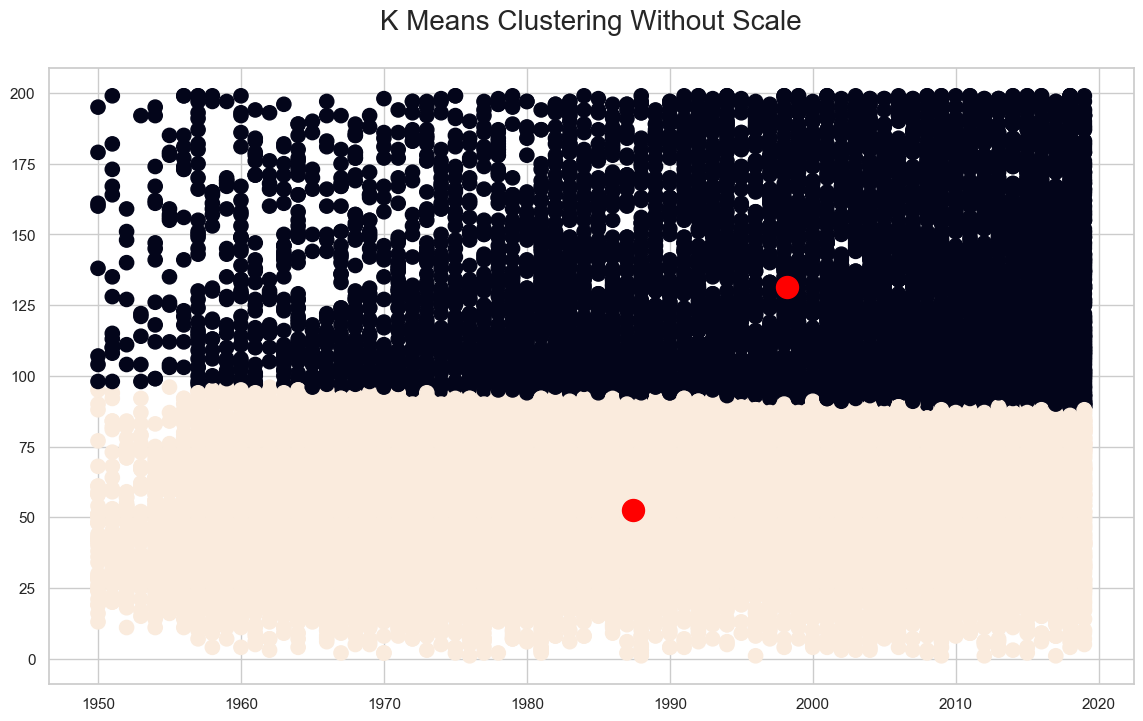

In [45]:
# view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('K Means Clustering Without Scale\n', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

# K Means Clustering with Scaling

In [46]:
# create an Elbow Plot of WCSS on scaled values

# create and use the standard scaler object to ensure all variables have equal range

scaler = StandardScaler()

# fit and transform to create a scaled version of 'X1'

X1_scaled = scaler.fit_transform(X1)

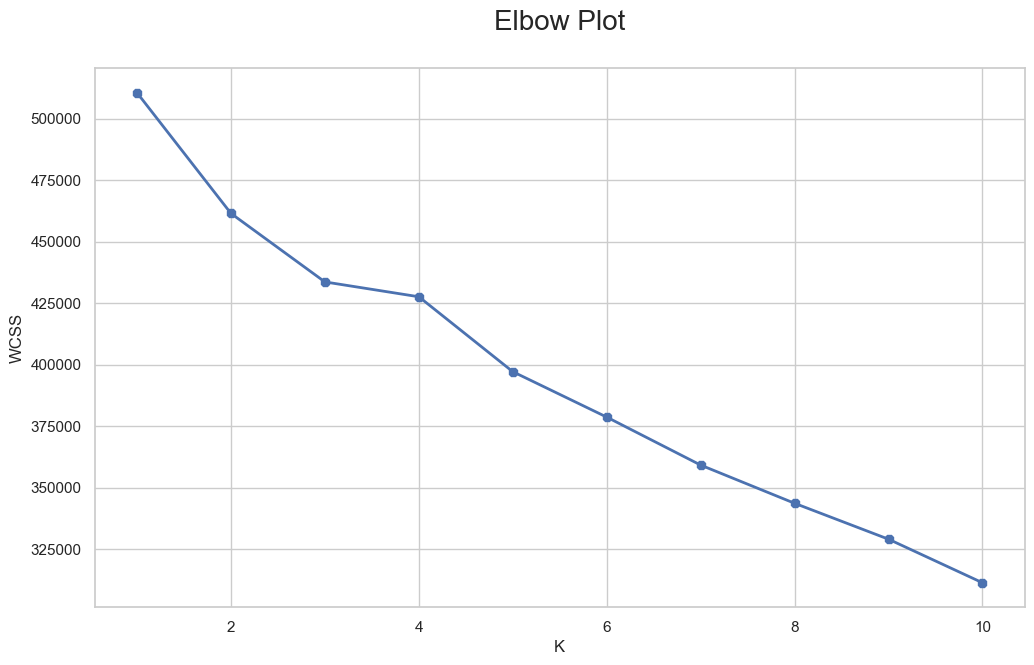

In [47]:
wcss_scaled = []
for k in range(1, 11):
    # TODO: create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++')

    # fit your kmeans algorithm on your scaled dataset
    kmeans.fit(X1_scaled)

    # append the WCSS aka inertia to your wcss_scaled list
    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss_scaled, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

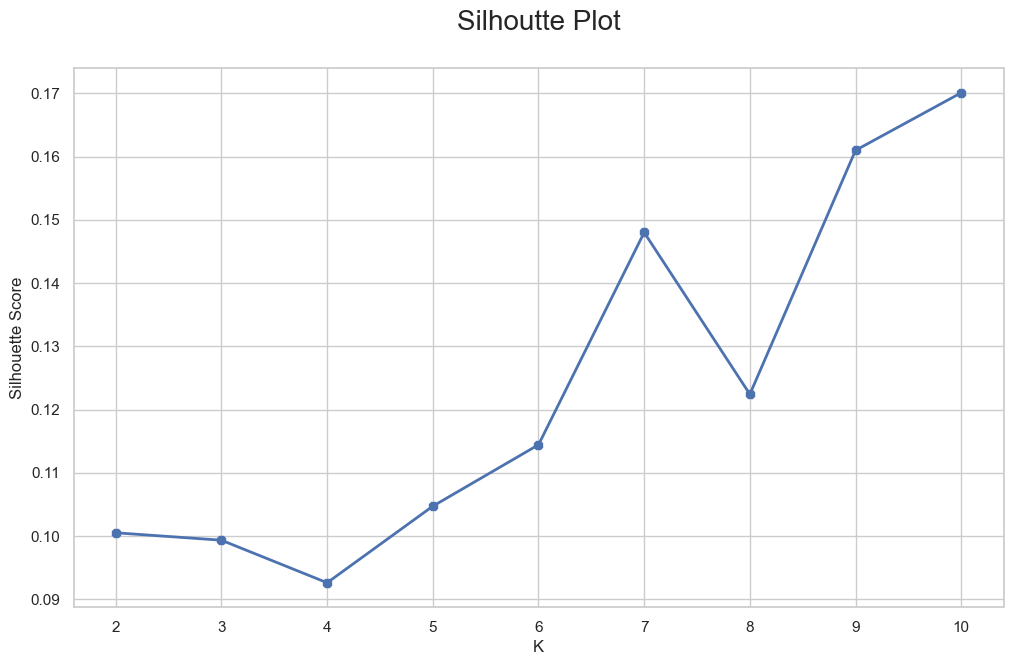

In [48]:
# create a plot of silhoutte score

silhouette_scaled = []
for k in range(2, 11):
    # create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    
    predictions = kmeans.fit_predict(X1_scaled)
    silhouette_scaled.append(metrics.silhouette_score(X1_scaled, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 11), silhouette_scaled, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

In [57]:
# create a new KMeans object with this optimal number of clusters. Name this object `kmeans_scaled`

kmeans_scaled = KMeans(n_clusters = 4, init='k-means++', n_init=20, random_state=42)

# fit this KMeans object on your data

kmeans_scaled.fit(X1_scaled)

KMeans(n_clusters=4, n_init=20, random_state=42)

In [58]:
#nGenerate labels for the  dataset

labels = kmeans_scaled.fit_predict(X1_scaled)
labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [59]:
# output the centroids of your clusters

kmeans_scaled.cluster_centers_

array([[-1.05553764, -0.44512714,  0.17209899, -0.46701488,  0.09391798,
         0.12112628, -0.09509861,  0.11942389,  0.41587378, -0.00853603,
        -0.34553107,  0.3892562 , -0.08639448,  0.08433402, -0.00648728,
         0.07752773,  0.10231492,  1.05553764],
       [ 0.61209787, -0.15236018, -0.04652131, -0.44550772,  0.36384912,
         0.14049458, -0.01817328, -0.08883283, -0.09167041,  0.1053667 ,
        -0.41522936, -0.08182088, -0.06474254, -0.00374634, -0.04620734,
         0.5056326 ,  0.05943451, -0.61209787],
       [ 0.28692117,  0.04804905, -0.17858746,  1.72413917, -0.35538194,
        -0.20587245, -0.0297486 , -0.04414495, -0.25886898, -0.06234914,
        -0.3963662 , -0.27047521,  0.04440973,  0.0761315 ,  0.20958709,
        -0.43268362, -0.13506634, -0.28692117],
       [ 0.57840283,  1.11859464, -0.03233182, -0.35997169, -0.44071003,
        -0.25404844,  0.26122605, -0.01352893, -0.3322757 , -0.10679022,
         1.97424802, -0.2836148 ,  0.24070365, -0.255

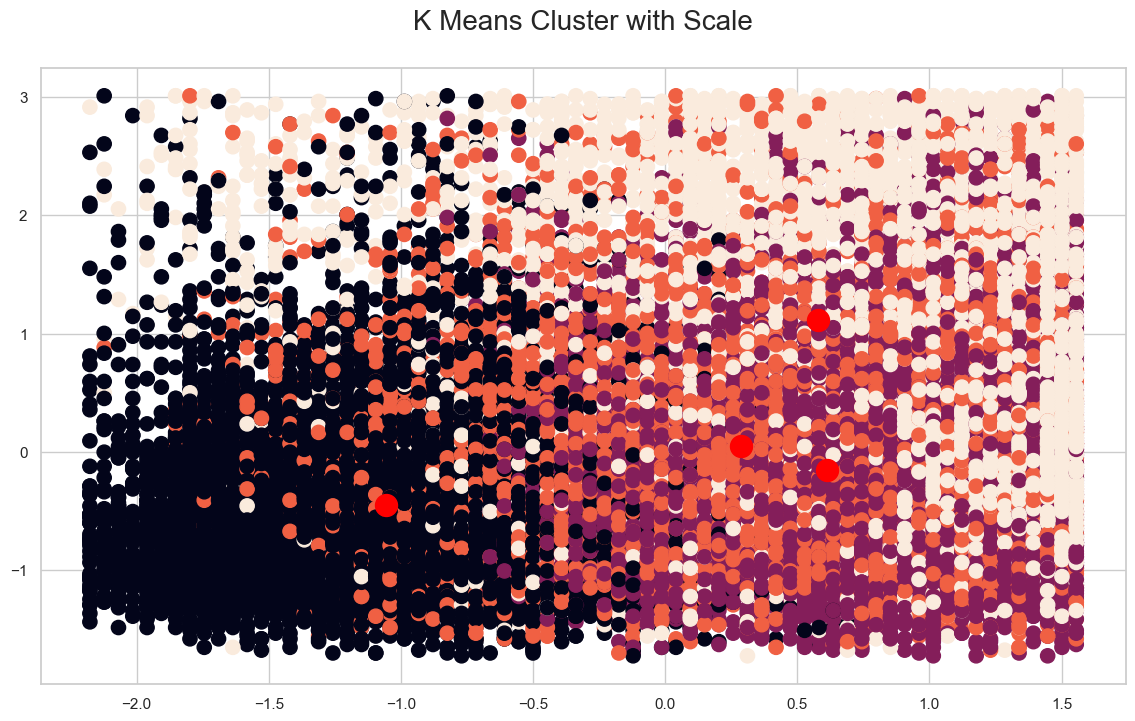

In [60]:
# view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c = kmeans_scaled.labels_, s = 105)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('K Means Cluster with Scale\n', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

This 2D chart is uncomprehendible. There are so many features that it is impossible to decipher anything from this chart. Let's incorporate PCA and see if that helps to reduce noise and make this chart easier to understand.

In [62]:
# set PCA components and standardize data
pca = PCA(n_components=2)
transformed_pca = pca.fit_transform(X1_scaled)

# set up parameters for prediction
kmeans_scaled = KMeans(n_clusters=4, random_state=42)
clusters = kmeans_scaled.fit_predict(transformed_pca)

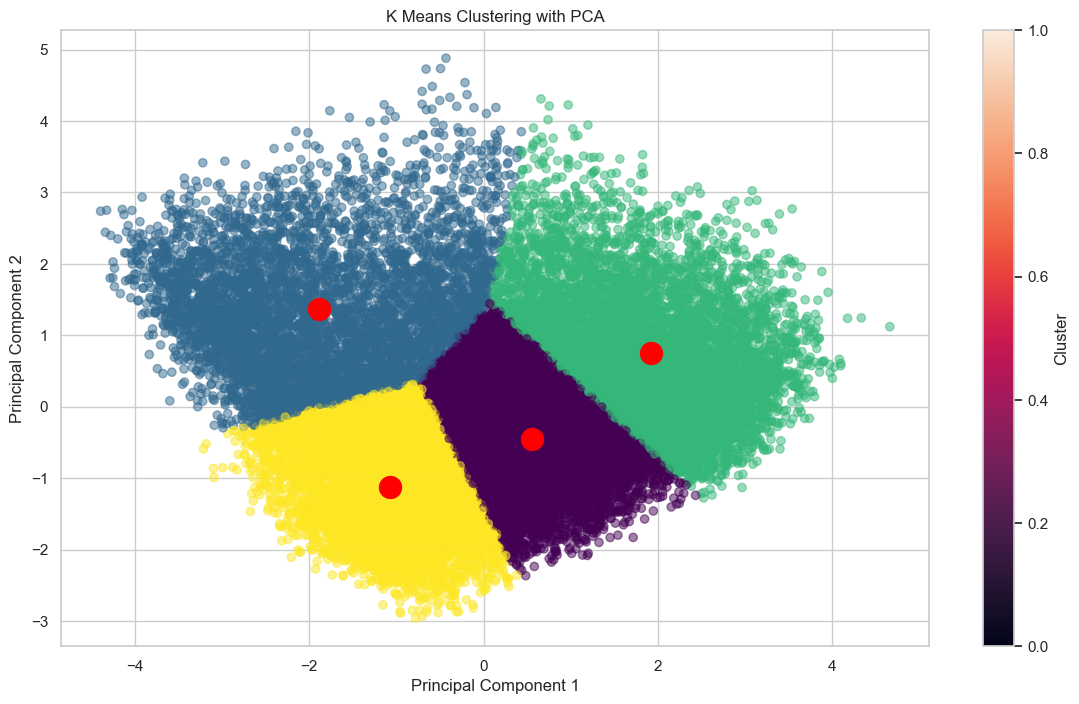

In [63]:
# plot PCA results

plt.figure(figsize=(14,8))
plt.scatter(transformed_pca[:,0], transformed_pca[:,1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_scaled.cluster_centers_[:,0], kmeans_scaled.cluster_centers_[:,1], color='red', s=250)
plt.title('K Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

This is a much better visual. From this model, we can see that the K Means Clustering with PCA worked and the model can sort songs. Now, let's go ahead and see how the songs were sorted. 